In [1]:
import pickle
import json
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
with open('/srv/datasets2/recipe1m+/food.com_data_rescaled/nutr/food.com_nutr_g_per_recipe.json') as f:
    nutr_per_recipes = json.load(f)
with open('/srv/datasets2/recipe1m+/food.com_data_rescaled/nutr/simplified_food_ids_per_recipes.json') as f:
    food_ids_per_recipes = json.load(f)
with open('/srv/datasets2/recipe1m+/food.com_data_rescaled/nutr/simplified_weighted_food_ids_per_recipes.json') as f:
    weighted_food_ids_per_recipes = json.load(f)

In [3]:
dir = 'ht/base'
im2recipe = np.load(f'../out/models/{dir}/im2recipe.npy')
recipe2im = np.load(f'../out/models/{dir}/recipe2im.npy')
distances = np.load(f'../out/models/{dir}/distances.npy')
with open(f'../out/models/{dir}/img_path','rb') as f:
    img_path = pickle.load(f)
with open(f'../out/models/{dir}/saved_ids','rb') as f:
    saved_ids = pickle.load(f)

In [4]:
def cal_gt_dist_mat(im2recipe):
    gt_dist_mat_dict = {
        'energy': np.empty_like(im2recipe,dtype=np.float32),
        'fat': np.empty_like(im2recipe,dtype=np.float32),
        'carb': np.empty_like(im2recipe,dtype=np.float32),
        'protein': np.empty_like(im2recipe,dtype=np.float32),
    }
    for i, recipe_row in enumerate(distances):
        for j, recipe in enumerate(recipe_row):
            for nutr_name in gt_dist_mat_dict.keys():
                gt_dist_mat_dict[nutr_name][i,j] = abs(nutr_per_recipes[saved_ids[i]][nutr_name] - nutr_per_recipes[saved_ids[j]][nutr_name])

    return gt_dist_mat_dict


In [5]:
gt_dist_mat_dict = cal_gt_dist_mat(im2recipe)

In [6]:
means = {'energy': 214.18438314061507,
 'fat': 10.869724474702819,
 'carb': 23.11948071123916,
 'protein': 6.518048957814834}

all_pair_gt_dist = []
all_pair_pred_dist = []
for i in range(len(distances) - 1):
    for j in range(i+1,len(distances[0])):
        gt_dist = 0
        for nutr_name in gt_dist_mat_dict.keys():
            gt_dist += gt_dist_mat_dict[nutr_name][i,j]/means[nutr_name]
        all_pair_gt_dist.append(gt_dist)
        all_pair_pred_dist.append(distances[i,j])


In [7]:
dists_exact_target = []
for i in range(len(distances)):
    dists_exact_target.append(distances[i,i])
avg_dist_exact_target = np.array(dists_exact_target).mean()

In [8]:
sorted_idxs = np.argsort(np.array(all_pair_gt_dist))
all_pair_gt_dist = np.array(all_pair_gt_dist)[sorted_idxs]
all_pair_pred_dist = np.array(all_pair_pred_dist)[sorted_idxs]

Text(0, 0.5, 'feature distance')

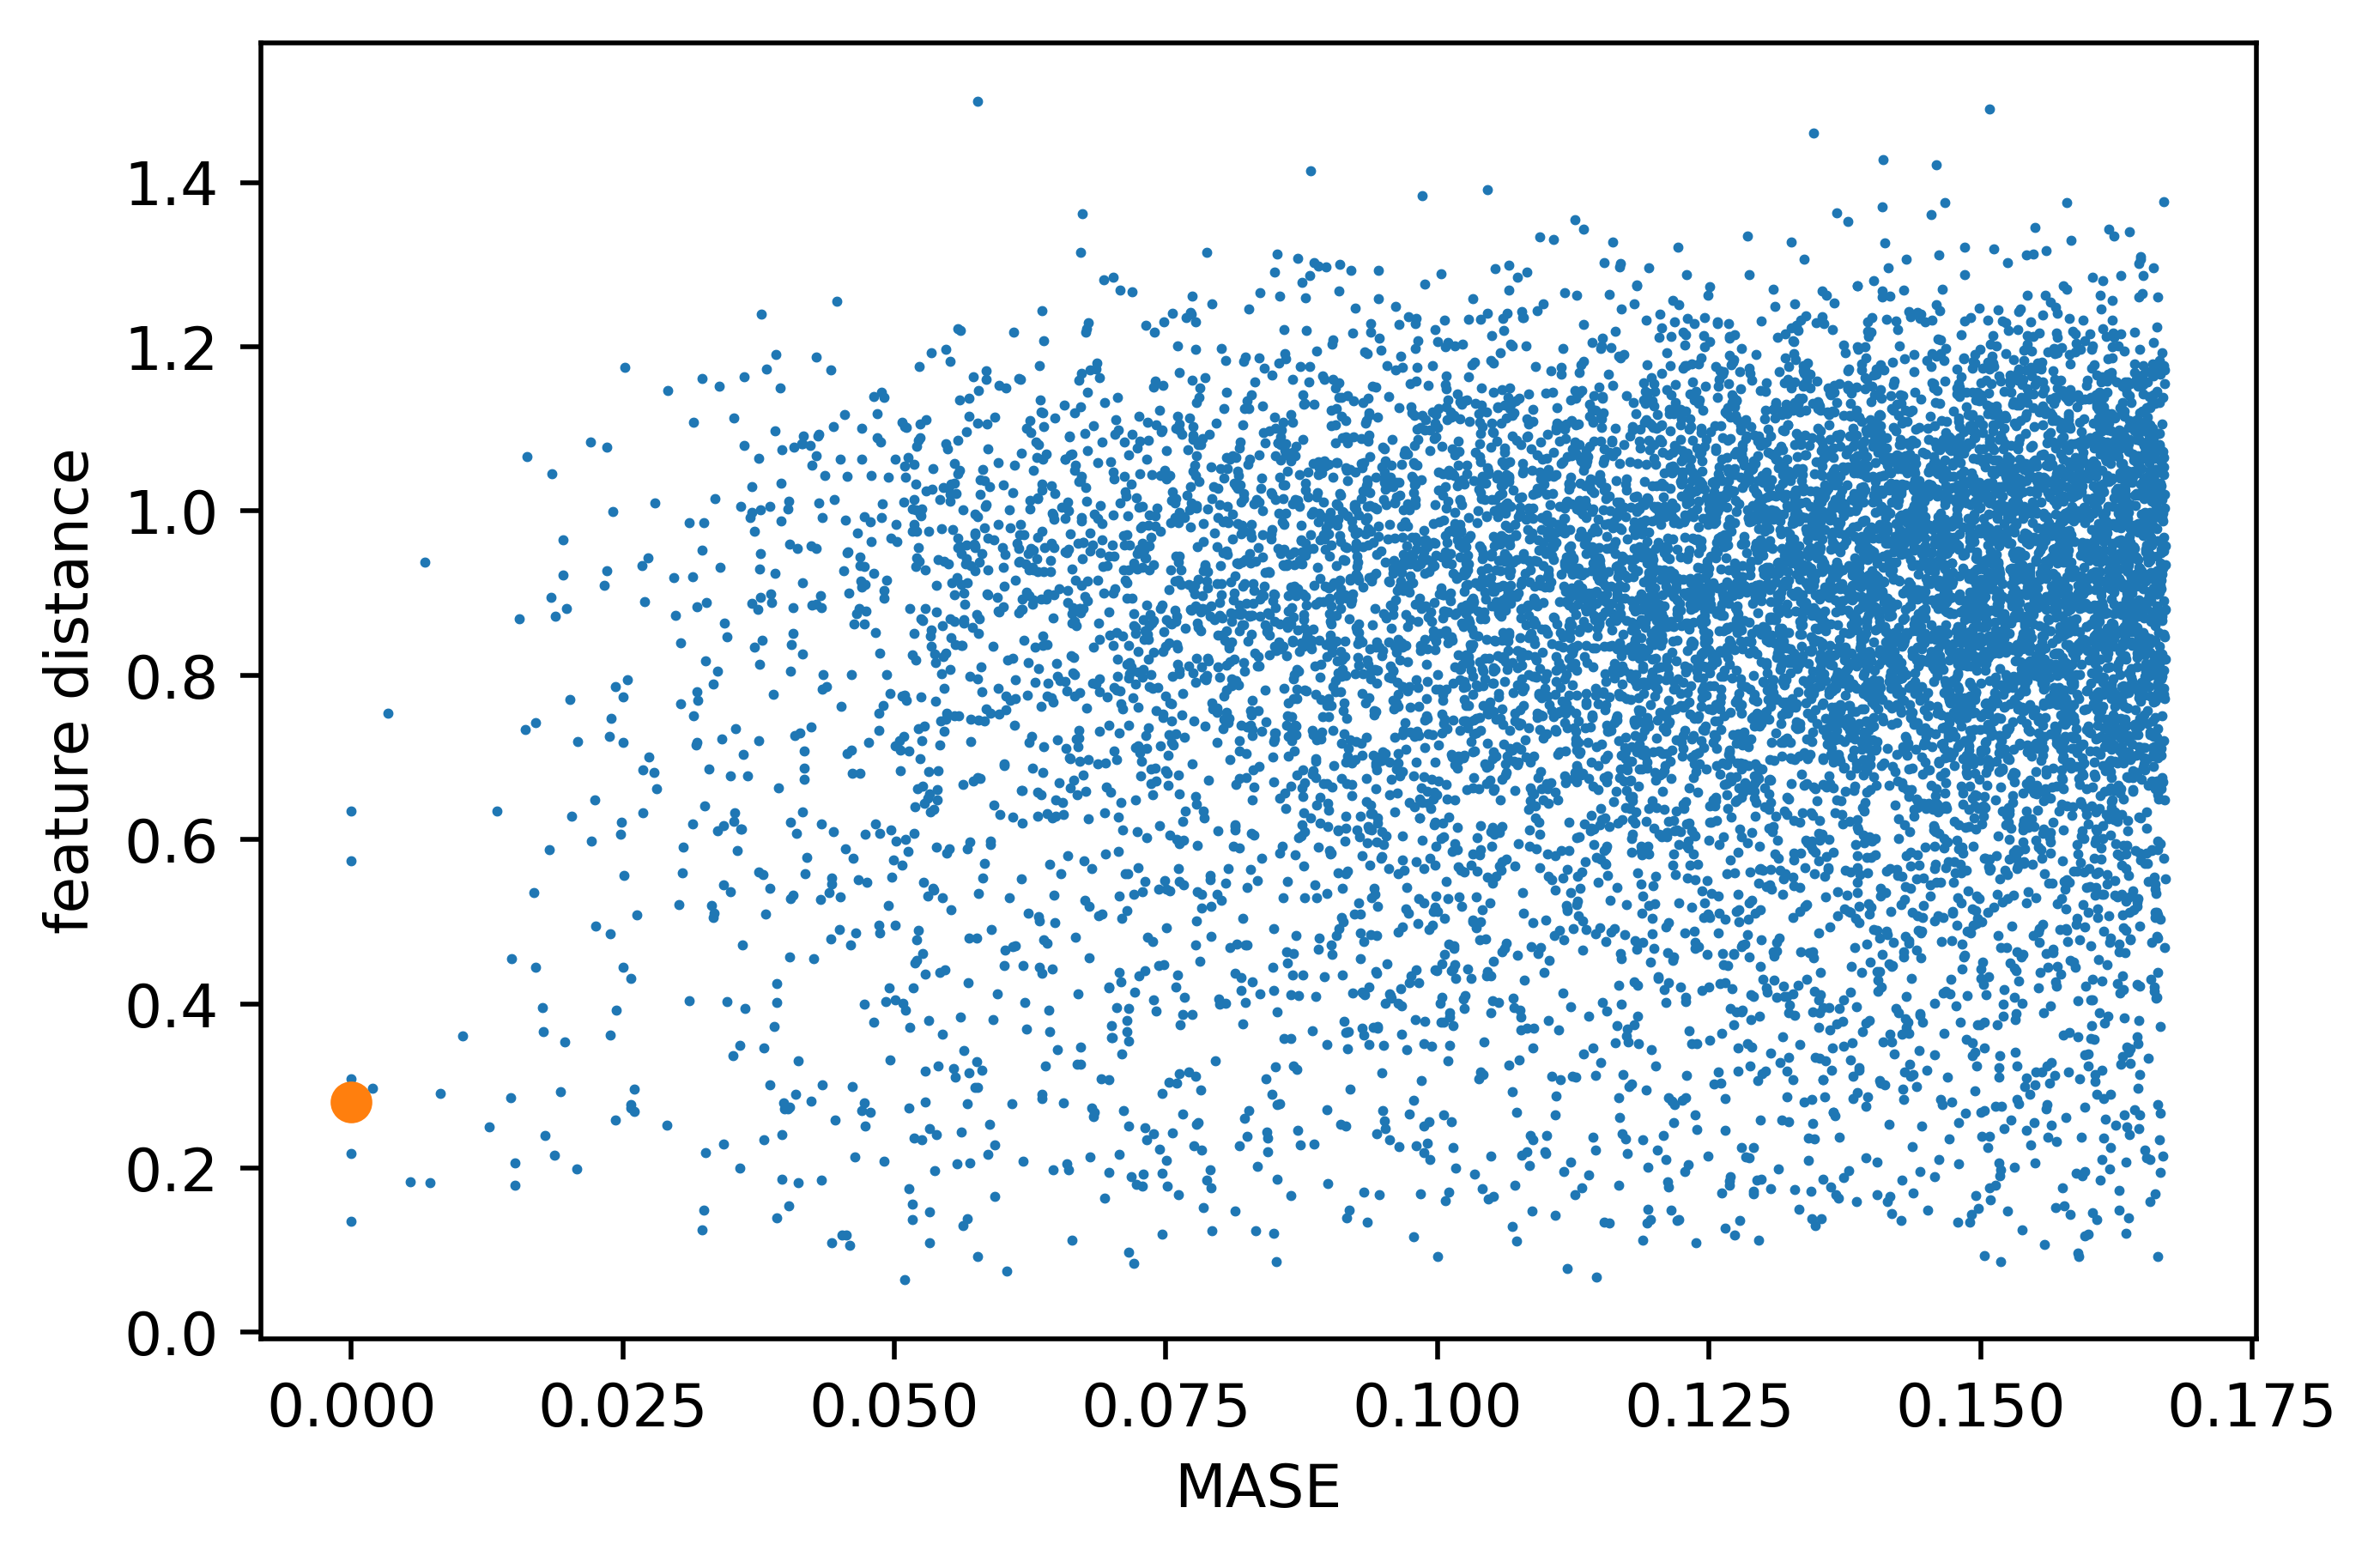

In [11]:
plt.figure(dpi=500)
plt.scatter(all_pair_gt_dist[:10000],all_pair_pred_dist[:10000],s=0.5)
plt.scatter([0],[avg_dist_exact_target])
plt.xlabel('MASE')
plt.ylabel('feature distance')

Text(0, 0.5, 'feature distance')

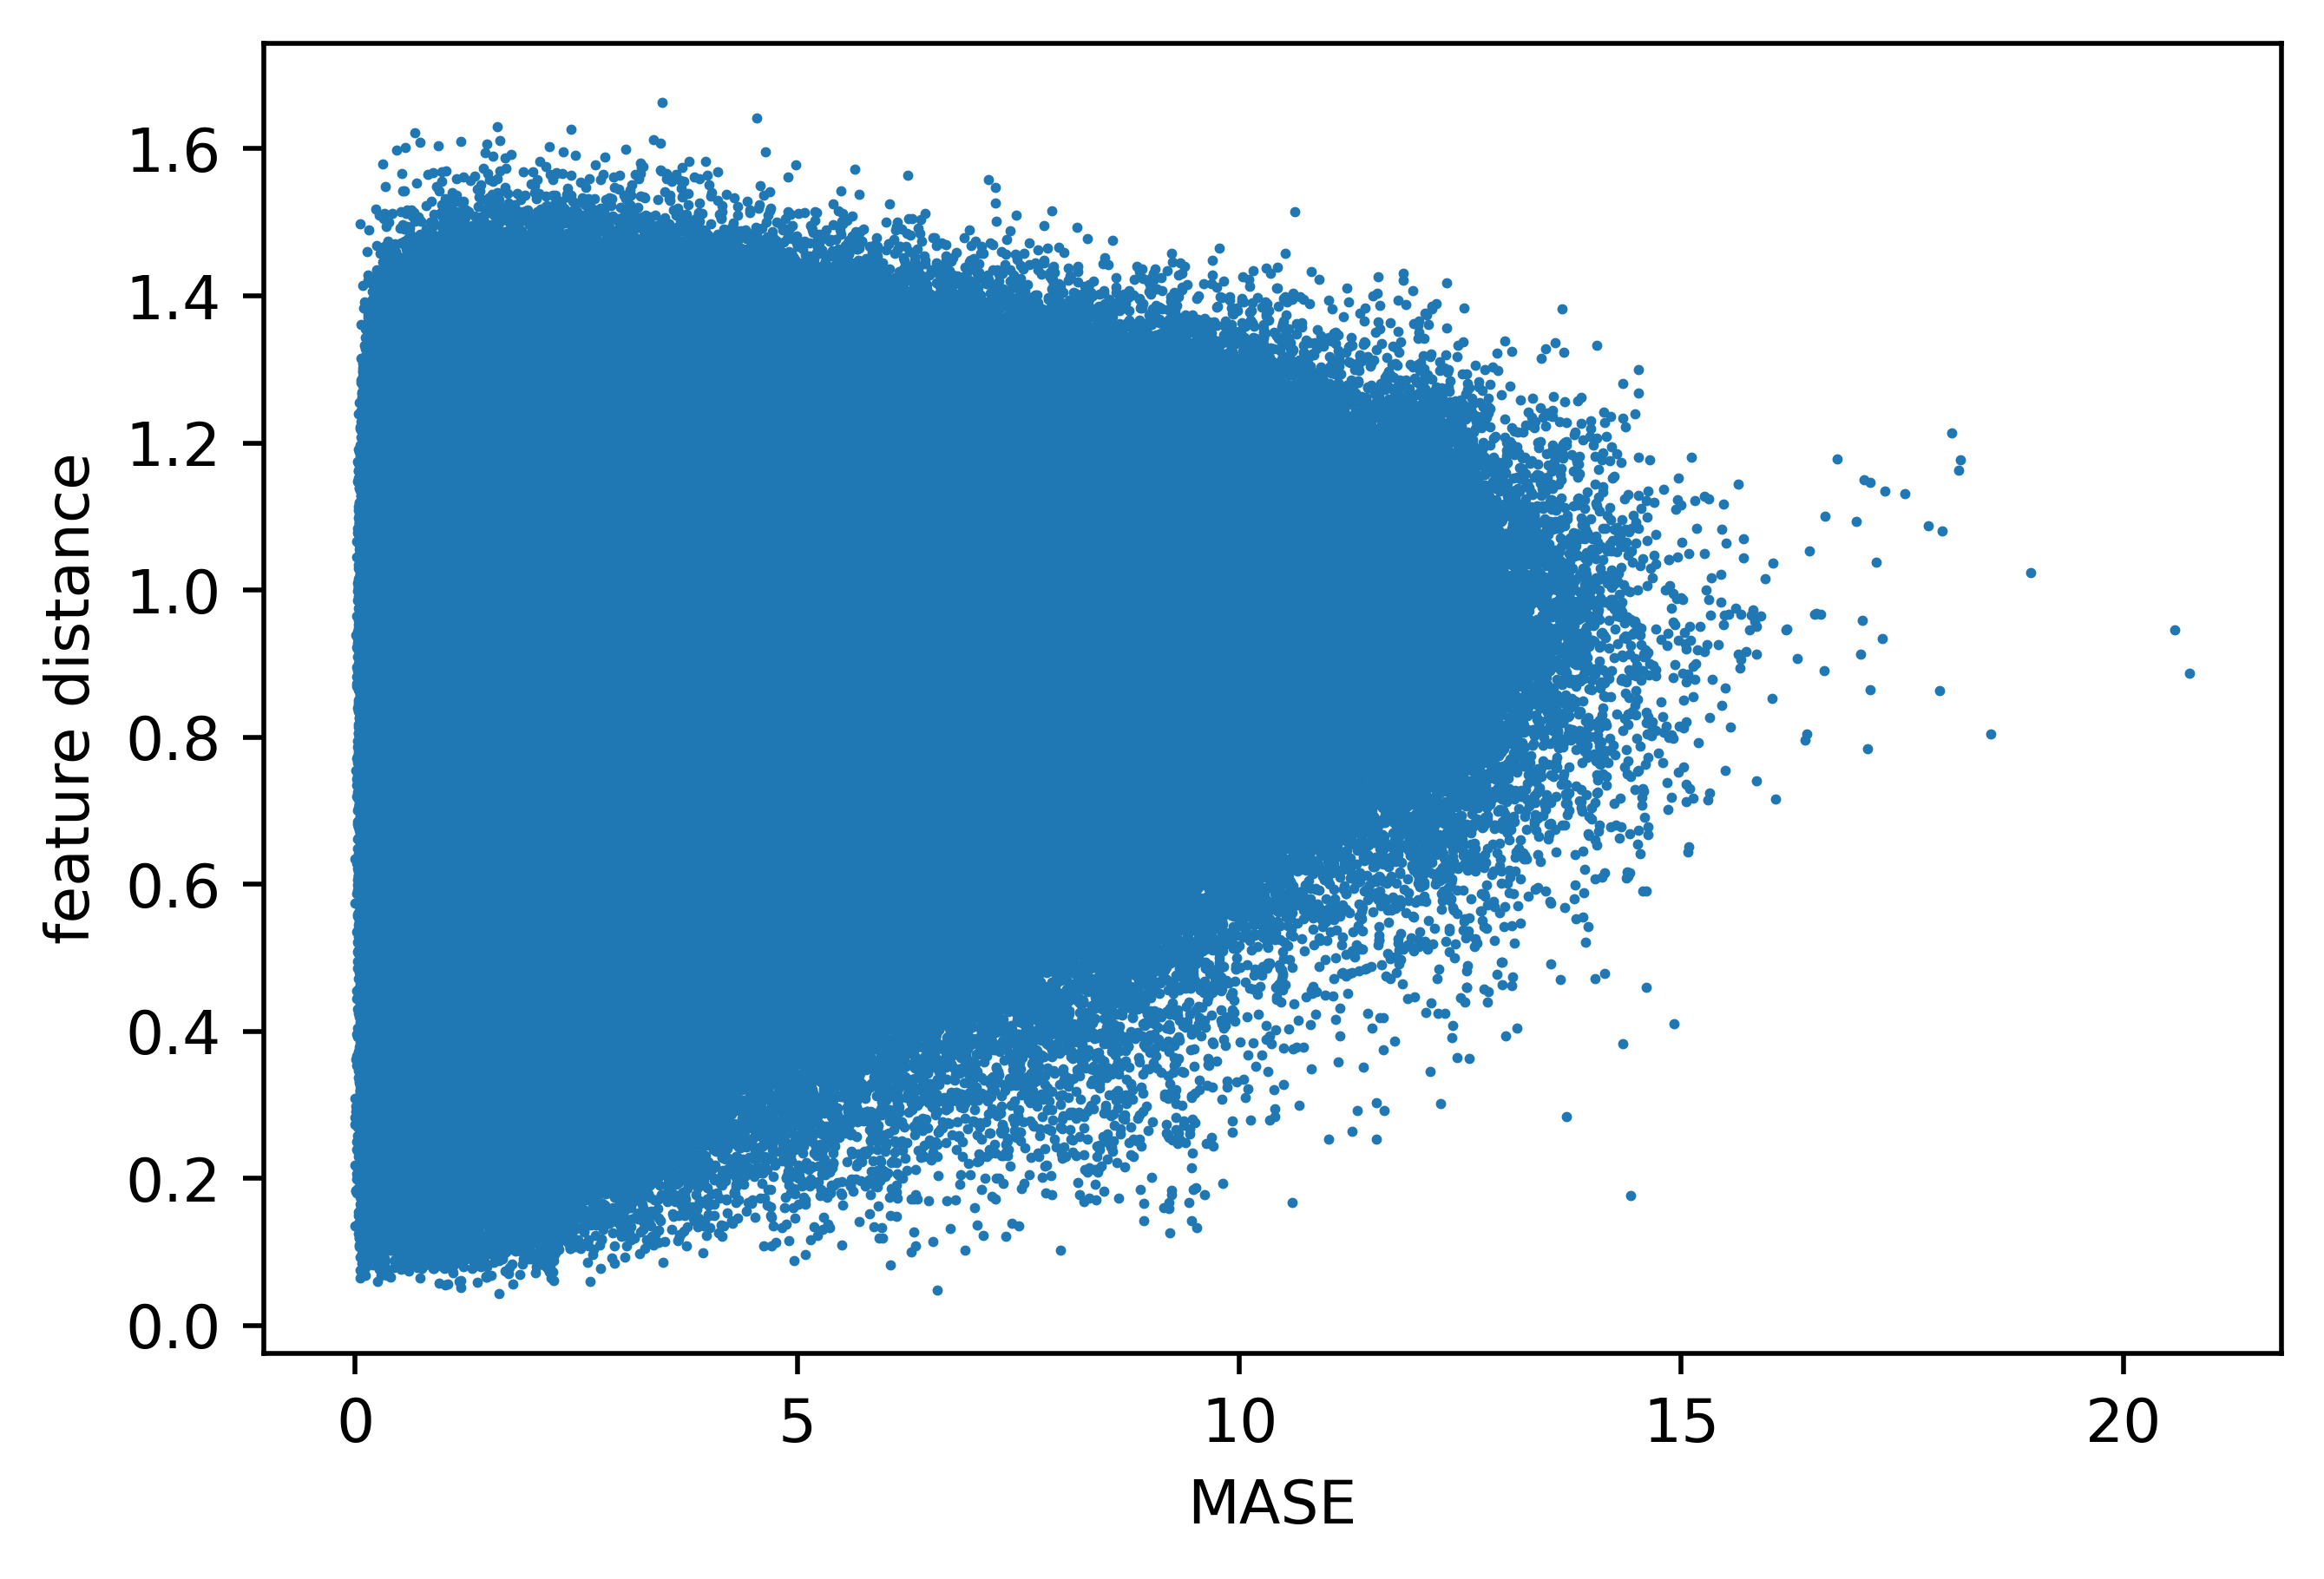

In [12]:
plt.figure(dpi=500)
plt.scatter(all_pair_gt_dist,all_pair_pred_dist,s=0.5)
plt.xlabel('MASE')
plt.ylabel('feature distance')

In [17]:
gts = {
    'energy': [],
    'fat': [],
    'carb': [],
    'protein': [],
}

for gt_nutrs in nutr_per_recipes.values():
    for nutr_name in gts.keys():
        gts[nutr_name].append(gt_nutrs[nutr_name])

In [20]:
means = {}
for nutr_name in gts.keys():
    means[nutr_name]=np.array(gts[nutr_name]).mean()

In [21]:
means

{'energy': 214.18438314061507,
 'fat': 10.869724474702819,
 'carb': 23.11948071123916,
 'protein': 6.518048957814834}